# Imports

In [1]:
import numpy
import math
from matplotlib import pyplot
%matplotlib inline

# 1. Complex numbers in Python

In [2]:
3+2j

(3+2j)

In [3]:
a = 3
b = 4
z = a + b *1j
print('z = ' , z)
print('The type of the variable is ' , type(z))

z =  (3+4j)
The type of the variable is  <class 'complex'>


In [4]:
(2.75 + 3.69j) * (8.55 - 6.13j)

(46.1322+14.692000000000004j)

In [5]:
1.4*numpy.exp(1j*5.32)

(0.79927078585823497-1.1494199453957457j)

In [6]:
(7.51 - 9.15j) / (4.43 + 9.64j)

(-0.4880897698448308-1.0033441577191493j)

# 2. Shapes created by the Joukowski transformation

In [7]:
def Joukowski(z,c):
    
    squigly = z + c**2/z
    
    return squigly

(1.5, -1.4999925829761689)

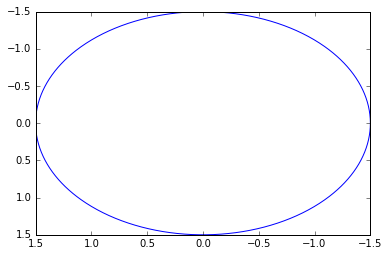

In [8]:
c = 1
r = 1.5
theta = numpy.linspace(0,2*math.pi,1000)
z1 = r*numpy.cos(theta) + r*numpy.sin(theta)*1j
pyplot.plot(z1.real,z1.imag)
pyplot.xlim(numpy.max(z1.real),numpy.min(z1.real))
pyplot.ylim(numpy.max(z1.real),numpy.min(z1.real))

(2.1666666666666665, -2.1666559531877994)

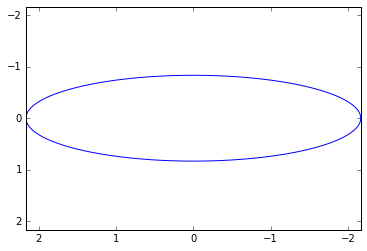

In [9]:
j1 = Joukowski(z1,c)
pyplot.plot(j1.real,j1.imag)
pyplot.xlim(numpy.max(j1.real),numpy.min(j1.real))
pyplot.ylim(numpy.max(j1.real),numpy.min(j1.real))

In [10]:
r = 1.2
z2 = r*numpy.cos(theta)-(c-r) + r*numpy.sin(theta)*1j

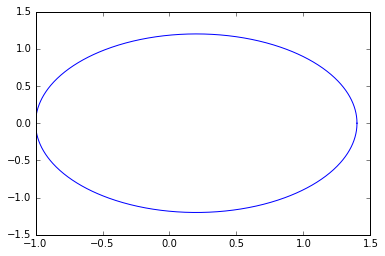

In [11]:
pyplot.plot(z2.real,z2.imag)

(2.1142857142857143, -1.9999857593339603)

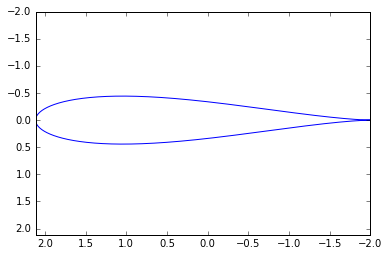

In [12]:
j2 = Joukowski(z2,c)
pyplot.plot(j2.real,j2.imag)
pyplot.xlim(numpy.max(j2.real),numpy.min(j2.real))
pyplot.ylim(numpy.max(j2.real),numpy.min(j2.real))

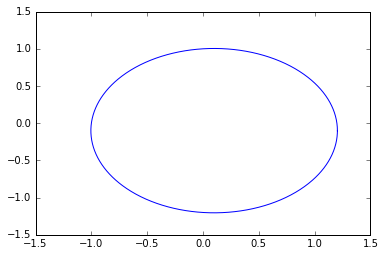

In [13]:
deltax , deltay = -0.1,0.1
r = ((c-deltax)**2+deltay**2)**.5
z3 = r*numpy.cos(theta)-(deltax) + (r*numpy.sin(theta) - deltay)*1j
pyplot.plot(z3.real,z3.imag)

(2.0335985955152447, -1.9999996532941537)

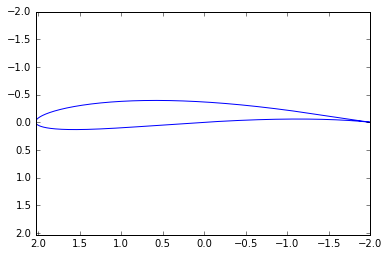

In [14]:
j3 = Joukowski(z3,c)
pyplot.plot(j3.real,j3.imag)
pyplot.xlim(numpy.max(j3.real),numpy.min(j3.real))
pyplot.ylim(numpy.max(j3.real),numpy.min(j3.real))

 # Grid points on the $z$-plane using polar coordinates

Creating the airfoil

In [15]:
c = 1.0
r = 1.15
deltax , deltay = -0.15,0.0
z = r*numpy.cos(theta)-(deltax) + (r*numpy.sin(theta) - deltay)*1j

Creating the grid

In [16]:
Nr = 100
Nt = 145
grid_r = numpy.linspace(r,5,Nr)
grid_theta = numpy.linspace(0,2*math.pi,Nt)
r_mesh,theta_mesh = numpy.meshgrid(grid_r,grid_theta)
x_grid = r_mesh*numpy.cos(theta_mesh) - (r-c)
y_grid = r_mesh*numpy.sin(theta_mesh)
z_grid = x_grid + y_grid*1j

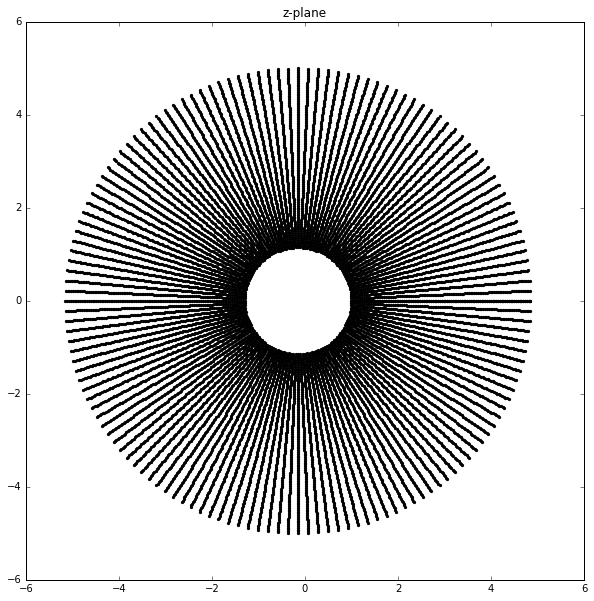

In [17]:
pyplot.figure(figsize=(10,10))
pyplot.scatter(z_grid.real,z_grid.imag,color='k', s=5)
pyplot.title('z-plane')

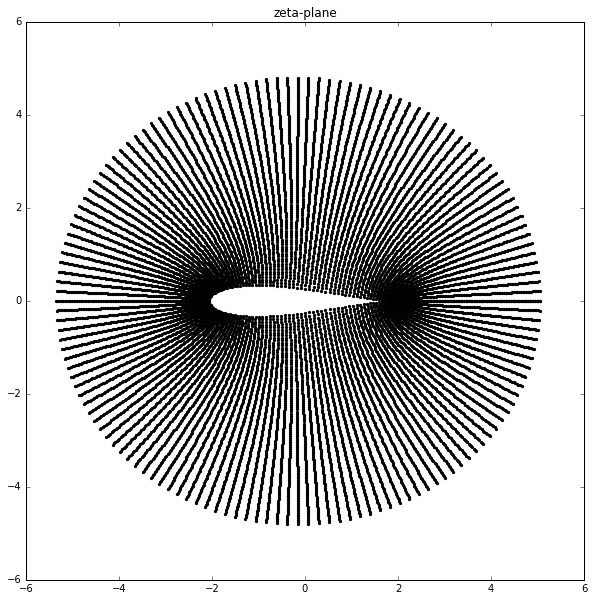

In [18]:
j_grid = Joukowski(z_grid,c)
pyplot.figure(figsize=(10,10))
pyplot.scatter(j_grid.real,j_grid.imag,color='k', s=5)
pyplot.title('zeta-plane')

 Free Stream

In [19]:
u_inf = 1.0
u_freestream = u_inf*numpy.ones((Nt, Nr), dtype=float)
v_freestream = numpy.zeros((Nt, Nr), dtype=float)
psi_freestream = u_inf*y_grid

Make velocity and psi functions

In [20]:
def get_vel(strength,x,y,X,Y):
    
    """
    Returns the velocity field for a doublet.
    
    Parameters
    ----------
    strength: float
        strength of doublet.
    x: float
        x-coordinate of the doublet.
    y: float
        y-coordinate of the doublet.
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    u: 2D Numpy array of floats
        x-component of the velocity vector field.
    v: 2D Numpy array of floats
        y-component of the velocity vector field.
    """
    
    u = -strength/(2*math.pi)*((X-x)**2-(Y-y)**2)/((X-x)**2+(Y-y)**2)**2
    v = -strength/(2*math.pi)*2*(X-x)*(Y-y)/((X-x)**2+(Y-y)**2)**2
    
    return u,v

def get_stream(strength,x,y,X,Y):
    
    """
    Returns the streamfunction for a doublet.
    
    Parameters
    ----------
    strength: float
        Strength of doublet.
    x: float
        x-coordinate of the doublet.
    y: float
        y-coordinate of the doublet.
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    psi: 2D Numpy array of floats
        stream function for doublet.
    """
    
    psi = -strength/(2*math.pi)*(Y-y)/((X-x)**2+(Y-y)**2)
    
    return psi
    

In [21]:
x_doublet = deltax
y_doublet = deltay
strength = (r**2)*2*math.pi*u_inf
strength

8.309512568745001

In [22]:
u_doublet , v_doublet = get_vel(strength,x_doublet,y_doublet,x_grid,y_grid)
psi_doublet = get_stream(strength,x_doublet,y_doublet,x_grid,y_grid)

u = u_doublet + u_freestream
v = v_doublet + v_freestream
psi = psi_doublet + psi_freestream

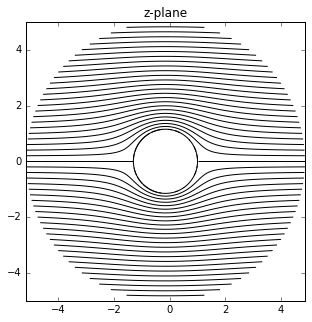

In [23]:
pyplot.figure(figsize=(5,5))
pyplot.contour(x_grid,y_grid,psi,levels=numpy.linspace(numpy.min(psi),numpy.max(psi),51), colors='k', linewidths=1, linestyles='solid')
pyplot.plot(r*numpy.cos(theta)-(r-c),r*numpy.sin(theta), color ='k',linewidth = 1)
pyplot.title('z-plane')

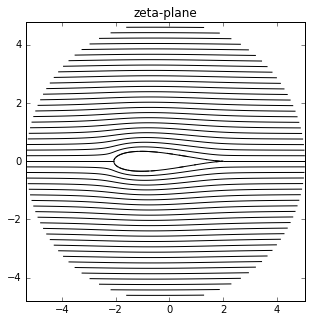

In [24]:
pyplot.figure(figsize=(5,5))
pyplot.contour(j_grid.real,j_grid.imag,psi,levels=numpy.linspace(numpy.min(psi),numpy.max(psi),51), colors='k', linewidths=1, linestyles='solid')
z_circle = r*numpy.cos(theta)-(r-c) + r*numpy.sin(theta)*1j
pyplot.plot(Joukowski(z_circle,c).real,Joukowski(z_circle,c).imag, color ='k')
pyplot.title('zeta-plane')

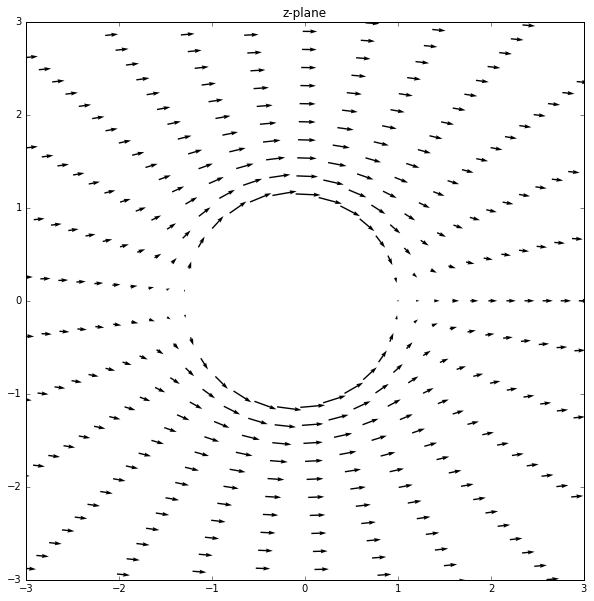

In [25]:
pyplot.figure(figsize=(10,10))
pyplot.quiver(x_grid[::5,::5],y_grid[::5,::5],u[::5,::5],v[::5,::5])
pyplot.xlim(-3,3);
pyplot.ylim(-3,3);
pyplot.title('z-plane')

In [26]:
vel_z = u - v*1j
vel_zeta = vel_z/(1-(c/z_grid)**2)

/home/gil/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


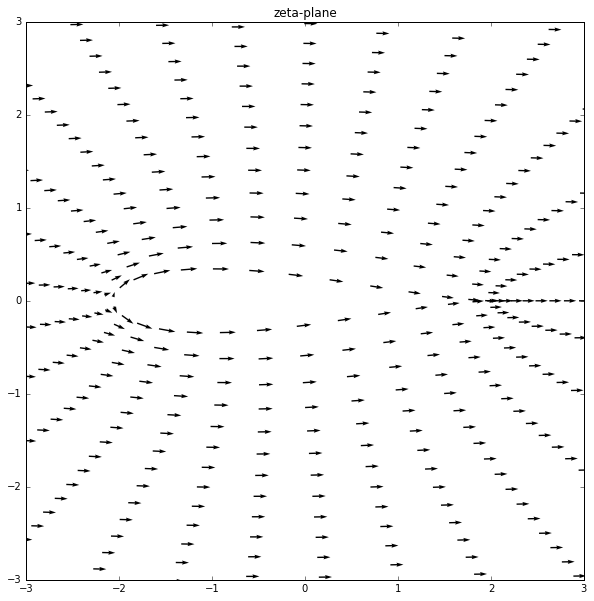

In [27]:
pyplot.figure(figsize=(10,10))
skip = 5
pyplot.quiver(j_grid.real[::skip,::skip],j_grid.imag[::skip,::skip],vel_zeta.real[::skip,::skip],-vel_zeta.imag[::skip,::skip])
pyplot.xlim(-3,3);
pyplot.ylim(-3,3);
pyplot.title('zeta-plane')

In [28]:
vel_zeta[61,0]

(1.1063384662852436-0.52363334929849692j)

Pressure

In [29]:
cp = 1.0 - (u**2+v**2)/u_inf**2
cp_zeta = 1.0 - (vel_zeta.real**2 + vel_zeta.imag**2)

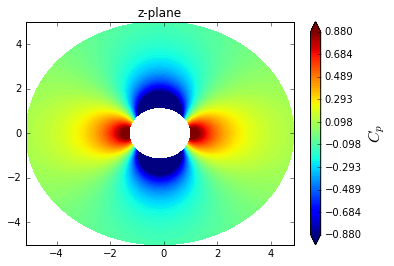

In [30]:
contf = pyplot.contourf(x_grid, y_grid, cp, levels=numpy.linspace(-.88, .88, 100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks(numpy.linspace(-.88,.88,10))
pyplot.title('z-plane')

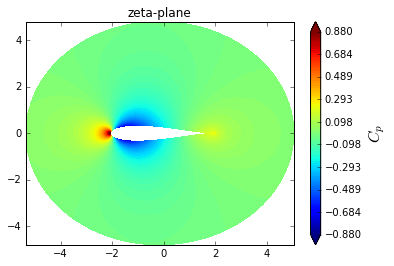

In [31]:
contf = pyplot.contourf(j_grid.real, j_grid.imag, cp_zeta, levels=numpy.linspace(-.88, .88, 100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks(numpy.linspace(-.88,.88,10))
pyplot.title('zeta-plane')

In [32]:
numpy.min(cp_zeta[1:,0])

-0.68775567409240557

#  5. Flow over a symmetric Joukowski airfoil with non-zero angle of attack, without circulation

In [33]:
AoA = 20
x_prime = (x_grid-deltax)*math.cos(AoA*math.pi/180)+(y_grid-deltay)*math.sin(AoA*math.pi/180)
y_prime = -(x_grid-deltax)*math.sin(AoA*math.pi/180)+(y_grid-deltay)*math.cos(AoA*math.pi/180)
x_doublet_prime = 0
y_doublet_prime = 0
u_doublet_prime , v_doublet_prime = get_vel(strength,x_doublet_prime,y_doublet_prime,x_prime,y_prime)
psi_doublet_prime = get_stream(strength,x_doublet_prime,y_doublet_prime,x_prime,y_prime)

psi_freestream = u_inf*y_prime
u_prime = u_doublet_prime + u_freestream
v_prime = v_doublet_prime + v_freestream
psi_prime = psi_doublet_prime + psi_freestream

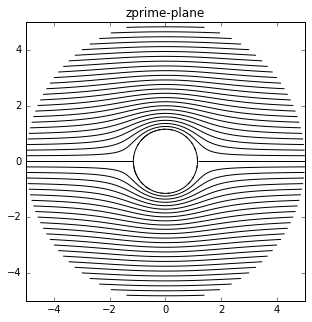

In [34]:
pyplot.figure(figsize=(5,5))
pyplot.contour(x_prime,y_prime,psi_prime,levels=numpy.linspace(numpy.min(psi),numpy.max(psi),51), colors='k', linewidths=1, linestyles='solid')
pyplot.plot(r*numpy.cos(theta),r*numpy.sin(theta), color ='k',linewidth = 1)
pyplot.title('zprime-plane')

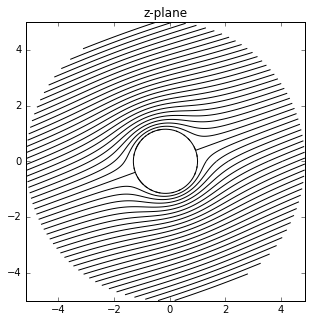

In [35]:
pyplot.figure(figsize=(5,5))
pyplot.contour(x_grid,y_grid,psi_prime,levels=numpy.linspace(numpy.min(psi),numpy.max(psi),51), colors='k', linewidths=1, linestyles='solid')
pyplot.plot(r*numpy.cos(theta)-(r-c),r*numpy.sin(theta), color ='k',linewidth = 1)
pyplot.title('z-plane')


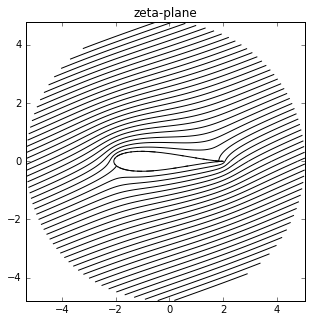

In [36]:
pyplot.figure(figsize=(5,5))
pyplot.contour(j_grid.real,j_grid.imag,psi_prime,levels=numpy.linspace(numpy.min(psi),numpy.max(psi),51), colors='k', linewidths=1, linestyles='solid')
z_circle = r*numpy.cos(theta)-(r-c) + r*numpy.sin(theta)*1j
pyplot.plot(Joukowski(z_circle,c).real,Joukowski(z_circle,c).imag, color ='k')
pyplot.title('zeta-plane')

In [37]:
vel_z_prime = u_prime - v_prime*1j
vel_z = vel_z_prime*numpy.exp(-(AoA*math.pi/180)*1j)
u = vel_z.real
v = -vel_z.imag

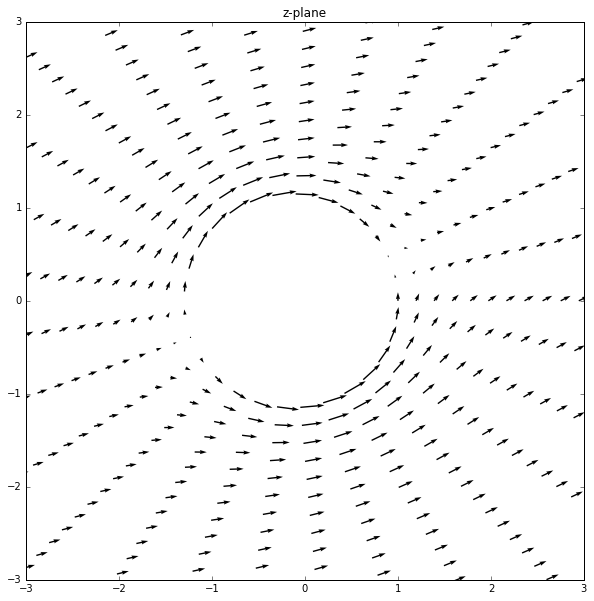

In [38]:
pyplot.figure(figsize=(10,10))
pyplot.quiver(x_grid[::5,::5],y_grid[::5,::5],u[::5,::5],v[::5,::5])
pyplot.xlim(-3,3);
pyplot.ylim(-3,3);
pyplot.title('z-plane')

/home/gil/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app


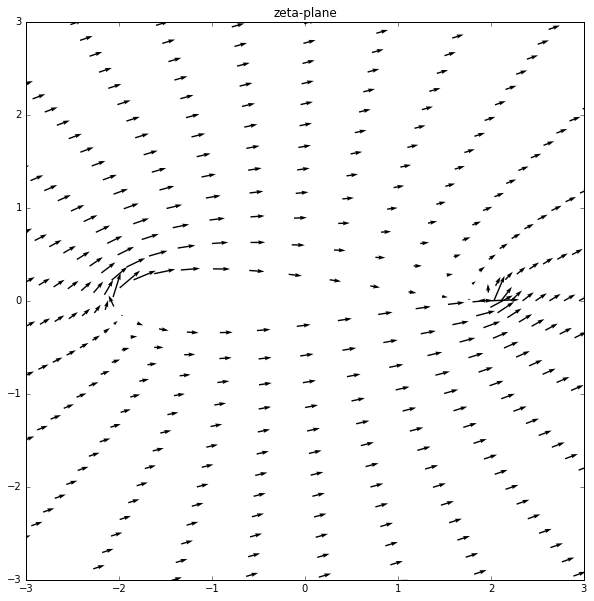

In [39]:
vel_z = u - v*1j
vel_zeta = vel_z/(1-(c/z_grid)**2)
pyplot.figure(figsize=(10,10))
skip = 5
pyplot.quiver(j_grid.real[::skip,::skip],j_grid.imag[::skip,::skip],vel_zeta.real[::skip,::skip],-vel_zeta.imag[::skip,::skip])
pyplot.xlim(-3,3);
pyplot.ylim(-3,3);
pyplot.title('zeta-plane')

stagnation points (note assigment indexs trailing edge as 1 not 0)

In [40]:
numpy.where(numpy.abs(vel_zeta[:,0]).real < 1e-10)  

(array([ 8, 80]),)

Finding various velocities for points on the airfoil

In [41]:
vel_zeta[49,0]


(1.4830654150147844-0.092075495007288052j)

In [42]:
cp = 1.0 - (u**2+v**2)/u_inf**2
cp_zeta = 1.0 - (vel_zeta.real**2 + vel_zeta.imag**2)

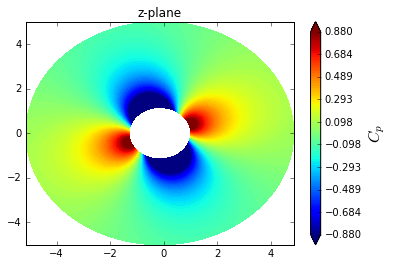

In [43]:
contf = pyplot.contourf(x_grid, y_grid, cp, levels=numpy.linspace(-.88, .88, 100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks(numpy.linspace(-.88,.88,10))
pyplot.title('z-plane')

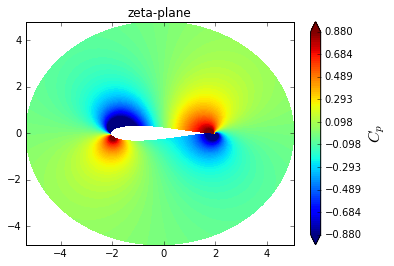

In [44]:
contf = pyplot.contourf(j_grid.real, j_grid.imag, cp_zeta, levels=numpy.linspace(-.88, .88, 100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks(numpy.linspace(-.88,.88,10))
pyplot.title('zeta-plane')

finding Cp as various points on the airfoil

In [45]:
cp_zeta[74,0]

-0.48520991643725964

# 6. Flow over a symmetric Joukowski airfoil with non-zero angle of attack, with circulation

In [46]:
def get_vel_vor(strength, x, y, X, Y):
    
    """
    Returns the velocity field for a vortex.
    
    Parameters
    ----------
    strength: float
        Strength of vortex.
    x: float
        x-coordinate of the vortex.
    y: float
        y-coordinate of the vortex.
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    u: 2D Numpy array of floats
        x-component of velocity field.
    v: 2D Numpy array of floats
        y-component of velocity field.
    """
    u = + strength/(2*math.pi)*(Y-y)/((X-x)**2+(Y-y)**2)
    v = - strength/(2*math.pi)*(X-x)/((X-x)**2+(Y-y)**2)
    return u, v

def get_stream_vor(strength,x,y,X,Y):
    
    """
    Returns the velocity field for a vortex.
    
    Parameters
    ----------
    strength: float
        Strength of vortex.
    x: float
        x-coordinate of the vortex.
    y: float
        y-coordinate of the vortex.
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    u: 2D Numpy array of floats
        x-component of velocity field.
    v: 2D Numpy array of floats
        y-component of velocity field.
    """
    
    psi = strength/(4*math.pi)*numpy.log((X-x)**2+(Y-y)**2)
    return psi

finding the strength of the vortex

In [47]:
gamma = -strength*2*math.sin(-1*AoA*math.pi/180)/r
x_vor ,y_vor = 0.0 , 0.0
gamma

4.942644660397584

In [48]:
u_vor,v_vor = get_vel_vor(gamma,x_vor,y_vor,x_prime,y_prime)
psi_vor = get_stream_vor(gamma,x_vor,y_vor,x_prime,y_prime)

In [49]:
u_prime = u_doublet_prime + u_freestream + u_vor
v_prime = v_doublet_prime + v_freestream + v_vor
psi_prime = psi_doublet_prime + psi_freestream

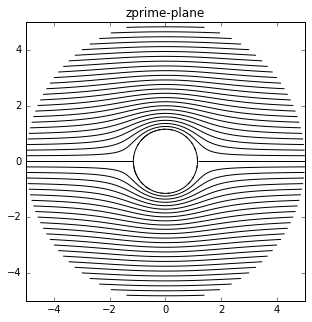

In [50]:
pyplot.figure(figsize=(5,5))
pyplot.contour(x_prime,y_prime,psi_prime,levels=numpy.linspace(numpy.min(psi_prime),numpy.max(psi_prime),51), colors='k', linewidths=1, linestyles='solid')
pyplot.plot(r*numpy.cos(theta),r*numpy.sin(theta), color ='k',linewidth = 1)
pyplot.title('zprime-plane')

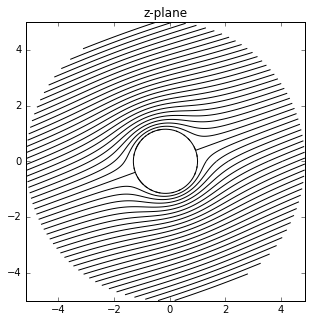

In [51]:
pyplot.figure(figsize=(5,5))
pyplot.contour(x_grid,y_grid,psi_prime,levels=numpy.linspace(numpy.min(psi_prime),numpy.max(psi_prime),51), colors='k', linewidths=1, linestyles='solid')
pyplot.plot(r*numpy.cos(theta)-(r-c),r*numpy.sin(theta), color ='k',linewidth = 1)
pyplot.title('z-plane')

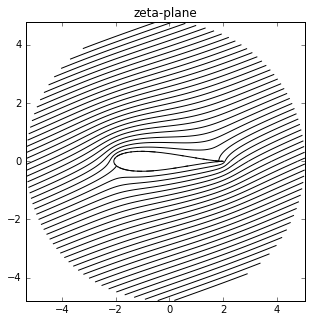

In [52]:
pyplot.figure(figsize=(5,5))
pyplot.contour(j_grid.real,j_grid.imag,psi_prime,levels=numpy.linspace(numpy.min(psi_prime),numpy.max(psi_prime),51), colors='k', linewidths=1, linestyles='solid')
z_circle = r*numpy.cos(theta)-(r-c) + r*numpy.sin(theta)*1j
pyplot.plot(Joukowski(z_circle,c).real,Joukowski(z_circle,c).imag, color ='k')
pyplot.title('zeta-plane')

In [53]:
vel_z_prime = u_prime - v_prime*1j
vel_z = vel_z_prime*numpy.exp(-(AoA*math.pi/180)*1j)
u = vel_z.real
v = -vel_z.imag

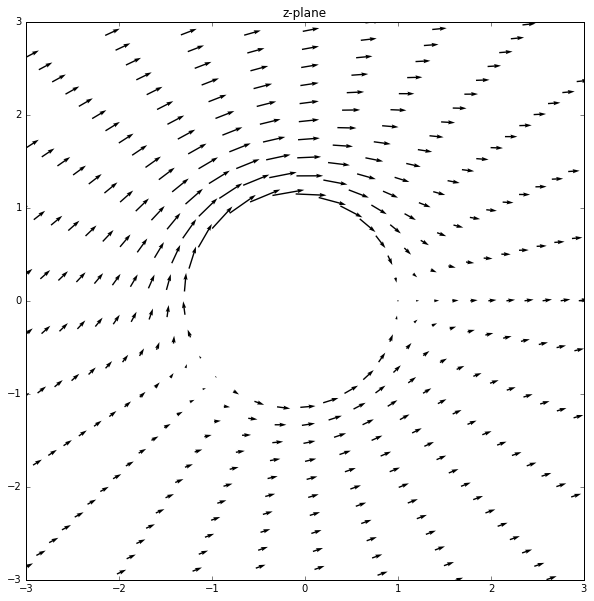

In [54]:
pyplot.figure(figsize=(10,10))
skip = 5
pyplot.quiver(x_grid[::skip,::skip],y_grid[::skip,::skip],u[::skip,::skip],v[::skip,::skip])
pyplot.xlim(-3,3);
pyplot.ylim(-3,3);
pyplot.title('z-plane')

/home/gil/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app


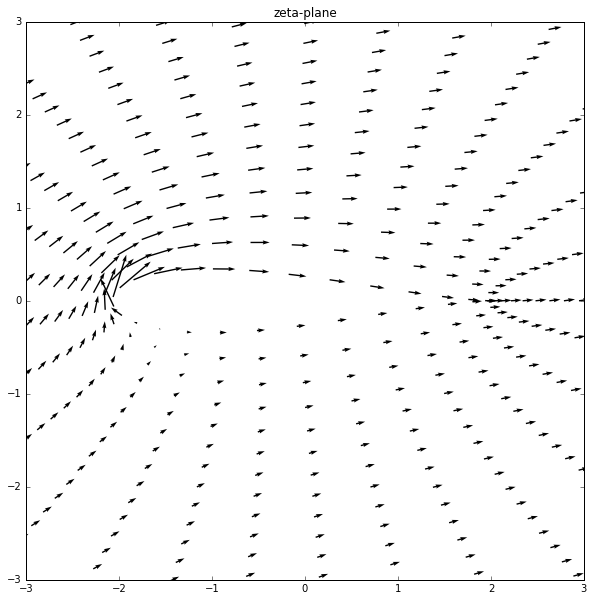

In [55]:
vel_z = u - v*1j
vel_zeta = vel_z/(1-(c/z_grid)**2)
pyplot.figure(figsize=(10,10))
skip = 5
pyplot.quiver(j_grid.real[::skip,::skip],j_grid.imag[::skip,::skip],vel_zeta.real[::skip,::skip],-vel_zeta.imag[::skip,::skip])
pyplot.xlim(-3,3);
pyplot.ylim(-3,3);
pyplot.title('zeta-plane')

In [56]:
cp = 1.0 - (u**2+v**2)/u_inf**2
cp_zeta = 1.0 - (vel_zeta.real**2 + vel_zeta.imag**2)

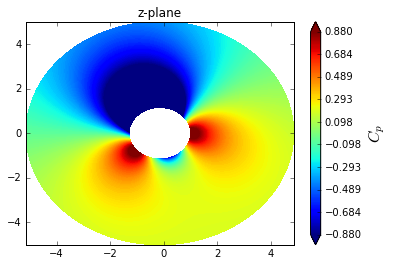

In [57]:
contf = pyplot.contourf(x_grid, y_grid, cp, levels=numpy.linspace(-.88, .88, 200), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks(numpy.linspace(-.88,.88,10))
pyplot.title('z-plane')

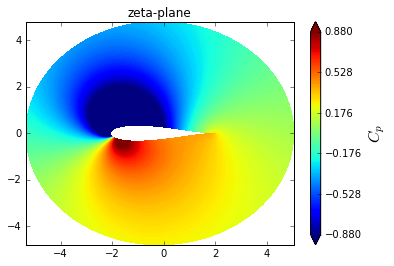

In [58]:
contf = pyplot.contourf(j_grid.real, j_grid.imag, cp_zeta, levels=numpy.linspace(-.88, .88, 200), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks(numpy.linspace(-.88,.88,6))
pyplot.title('zeta-plane')

Lift and Drag

In [67]:
rho = 1
Lift = gamma*u_inf*math.cos(AoA*math.pi/180)*rho
Lift

4.644566714542482

In [69]:
Drag = gamma*u_inf*math.sin(AoA*math.pi/180)*rho
Drag

1.690484035157033

Stagnation points (first point is the trailing edge)

In [59]:
numpy.where(numpy.abs(vel_zeta[:,0]).real < 1e-10)  

(array([88]),)

Finding the Vel at a given point on the airfoil

In [60]:
vel_zeta[91,0]

(0.20848311620747634+0.03198838919505248j)

Pressure at a given point

In [61]:
cp_zeta[110,0]

0.49669467238347376

What's going on with the pressure coefficient at the trailing edge of the airfoil?

In [ ]:
cp_zeta[0,0]

In [ ]:
vel_zeta[0,0]

In [ ]:
vel_z[0,0]

In [ ]:
vel_z_prime[0,0]

What is going on at the trailing edge?

as we can see the velocities calculated before the joukowski are very small and negative when transformed the values becomes very negative approximatedly negative infinity. This carrys on into the calculations for Cp